<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Merging-Data-from-Jackson-et-al-(2018)" data-toc-modified-id="Merging-Data-from-Jackson-et-al-(2018)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Merging Data from Jackson et al (2018)</a></span><ul class="toc-item"><li><span><a href="#Parsing-Table-2" data-toc-modified-id="Parsing-Table-2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parsing Table 2</a></span></li><li><span><a href="#Parsing-Table-4" data-toc-modified-id="Parsing-Table-4-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parsing Table 4</a></span></li><li><span><a href="#Merging-and-Unit-Correction" data-toc-modified-id="Merging-and-Unit-Correction-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Merging and Unit Correction</a></span></li></ul></li><li><span><a href="#Query-GAIA-DR2-and-2MASS" data-toc-modified-id="Query-GAIA-DR2-and-2MASS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Query GAIA DR2 and 2MASS</a></span></li><li><span><a href="#Isoclassify-$R_*$-Calculations-with-2MASS" data-toc-modified-id="Isoclassify-$R_*$-Calculations-with-2MASS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Isoclassify $R_*$ Calculations with 2MASS</a></span><ul class="toc-item"><li><span><a href="#Convert-Data-to-Isoclassify-readable-format" data-toc-modified-id="Convert-Data-to-Isoclassify-readable-format-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Convert Data to Isoclassify readable format</a></span></li><li><span><a href="#Executing-Isoclassify" data-toc-modified-id="Executing-Isoclassify-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Executing Isoclassify</a></span></li></ul></li><li><span><a href="#Merge-with-Kepler-K2-Catalog" data-toc-modified-id="Merge-with-Kepler-K2-Catalog-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Merge with Kepler K2 Catalog</a></span><ul class="toc-item"><li><span><a href="#Parsing-K2-Data-from-VizieR" data-toc-modified-id="Parsing-K2-Data-from-VizieR-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Parsing K2 Data from VizieR</a></span></li></ul></li><li><span><a href="#Merge-with-Redbul-2016" data-toc-modified-id="Merge-with-Redbul-2016-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Merge with Redbul 2016</a></span><ul class="toc-item"><li><span><a href="#Checking-if-Prot-and-LPer-are-in-agreement" data-toc-modified-id="Checking-if-Prot-and-LPer-are-in-agreement-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Checking if Prot and LPer are in agreement</a></span></li></ul></li><li><span><a href="#Using-Isoclassify-with-B-and-V-mags-From-K2" data-toc-modified-id="Using-Isoclassify-with-B-and-V-mags-From-K2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Using Isoclassify with B and V mags From K2</a></span><ul class="toc-item"><li><span><a href="#Converting-data-to-Isoclassify-readable-format" data-toc-modified-id="Converting-data-to-Isoclassify-readable-format-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Converting data to Isoclassify readable format</a></span></li><li><span><a href="#Executing-Isoclassify" data-toc-modified-id="Executing-Isoclassify-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Executing Isoclassify</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd

In [2]:
main_dir = "/u/kaimibk/Documents/Research/NAC/"
data_dir = main_dir+"data/"
out_dir = main_dir+"output/"

## Merging Data from Jackson et al (2018)

### Parsing Table 2

In [3]:
df_j1 = pd.read_csv(data_dir+"MN_17_3616_MJ_Table2.csv")
# save units row
j1_units = df_j1.loc[0]
# drop units row
df_j1 = df_j1.drop(0)
# Set index to "Name" column
df_j1 = df_j1.set_index("Name")

### Parsing Table 4

In [4]:
df_j2 = pd.read_csv(data_dir+"MN_17_3616_MJ_Table4.csv")
# save units row
j2_units = df_j2.loc[0]
# drop units row
df_j2 = df_j2.drop(0)
# drop repeat columns
df_j2 = df_j2.drop(columns=["PERIOD", "logL/Lo"])
# Set index to "Name" column
df_j2 = df_j2.set_index("Name")

### Merging and Unit Correction

In [5]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [6]:
df = pd.concat([df_j1, df_j2], axis=1)

In [7]:
temp = SkyCoord(ra=df.RA, dec=df.Dec, unit=(u.hourangle, u.deg))
df.RA, df.Dec = temp.ra.degree, temp.dec.degree
del temp

In [8]:
'''
If the VSINI is an upper limit (containing "<"), we shall use a flat distribution,
other wise we assume a uniform distribution centered at VSINI with std_dev = EVSINI.
So I am adding a column to reflect that for future reference.
'''
df["distribution"] = df.VSINI.apply(lambda x: "flat" if "<" in x else "uniform")

In [9]:
df.to_csv(data_dir+"Pleiades_master.csv")

## Query GAIA DR2 and 2MASS

In [4]:
df = pd.read_csv(data_dir+"Pleiades_master.csv")

In [15]:
from Queries import query_survey

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [14]:
# gaia_features = [
#         "parallax", "parallax_error",
#         "radius_val", "radius_percentile_lower", "radius_percentile_upper",
#         "lum_val", "lum_percentile_lower", "lum_percentile_upper",
#         "teff_val", "teff_percentile_lower", "teff_percentile_upper",
#         "bp_rp", "phot_g_mean_mag"
#     ]
# TMASS_features = [
#         "j_m", "j_msigcom", 
#         "h_m", "h_msigcom",
#         "k_m", "k_msigcom"
#    ]
gaia_features = ["parallax", "parallax_error"]

In [16]:
def query(row):
    if row % 10 == 0:
        print("Inspecting row {}".format(row))
    global gaia_features
    global TMASS_features
    
    query_survey(df, row, features=gaia_features, survey='GAIA')
    #query_survey(df, row, features=TMASS_features, survey='2MASS')

In [17]:
N = len(df)
for i in range(N):
    query(i)

Inspecting row 0


Inspecting row 10
Inspecting row 20
Inspecting row 30
Inspecting row 40
Inspecting row 50
Inspecting row 60
Inspecting row 70
Inspecting row 80
Inspecting row 90
Inspecting row 100
Inspecting row 110
Inspecting row 120
Inspecting row 130
Inspecting row 140
Inspecting row 150
Inspecting row 160
Inspecting row 170
Inspecting row 180
Inspecting row 190
Inspecting row 200
Inspecting row 210
Inspecting row 220
Inspecting row 230
Inspecting row 240
Inspecting row 250
Inspecting row 260
Inspecting row 270
Inspecting row 280
Inspecting row 290
Inspecting row 300
Inspecting row 310


In [18]:
df.tail(5)

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref,BCK,logL/Lo,M/Mo,...,k_msigcom,iso_rad,iso_rad_Err,radius_sigma,lum_sigma,teff_sigma,iso_teff,iso_teff_Err,V_iso,V_iso_err
314,J03511685+2349357,57.820233,23.826606,9.96,2.33,7.947,1,2.00,-0.62,0.80,...,0.021,0.005265,0.000237,0.024306,0.001953,96.000000,4660.209666,100.0,0.033517,0.001510
315,J03512213+2509580,57.842225,25.166136,10.66,3.51,7.569,1,2.49,-1.10,0.62,...,0.021,0.004285,0.000217,0.078210,0.000902,283.333374,4146.738294,100.0,0.028642,0.001451
316,J03512440+2405147,58.348742,24.065061,10.27,3.14,5.469,3,2.37,-0.89,0.69,...,0.021,0.006267,0.000255,0.075059,0.005008,266.000000,5171.733092,100.0,0.057979,0.002357
317,J03512993+2353572,58.348742,24.065061,10.30,3.06,0.884,3,2.34,-0.89,0.70,...,0.021,0.006267,0.000255,0.075059,0.005008,266.000000,5171.733092,100.0,0.358696,0.014581
318,J03514044+2458594,57.918500,24.983186,9.14,1.67,3.370,1,1.59,-0.13,1.01,...,0.022,0.006862,0.000258,0.057458,0.008954,163.500000,5619.949262,100.0,0.103014,0.003872


In [5]:
df["radius_sigma"] = pd.DataFrame([df["radius_percentile_upper"] - df["radius_val"],
                                 df["radius_val"] - df["radius_percentile_lower"]]).mean(axis=0)

df["lum_sigma"] = pd.DataFrame([df["lum_percentile_upper"] - df["lum_val"],
                                 df["lum_val"] - df["lum_percentile_lower"]]).mean(axis=0)

df["teff_sigma"] = pd.DataFrame([df["teff_percentile_upper"] - df["teff_val"],
                                 df["teff_val"] - df["teff_percentile_lower"]]).mean(axis=0)

In [20]:
df.to_csv(data_dir+"Pleiades_master.csv")

## Isoclassify $R_*$ Calculations with 2MASS

### Convert Data to Isoclassify readable format

In [4]:
df = pd.read_csv(data_dir+"Pleiades_master.csv", index_col=0)
df["band"] = "kmag"
#df["parallax"] = df["parallax"] * 10 ** (-3)
#df["parallax_error"] = df["parallax_error"] * 10 ** (-3)
df["Index"] = df.index
df_iso = df[["Index", "RA", "Dec", 
              "parallax", 
              "parallax_error",
              "j_m", "j_msigcom",
              "h_m", "h_msigcom",
              "k_m", "k_msigcom", "band", "Name"
             ]]
df_iso.columns = ["id_starname", "ra","dec",
                  "parallax","parallax_err",
                  "jmag","jmag_err","hmag",
                  "hmag_err","kmag","kmag_err",
                  "band","comments"]
df = df.drop(columns="Index")
df_iso.to_csv(main_dir+"Pleiades_iso.csv")
#df.index = df.Name

### Executing Isoclassify

In [3]:
import sys
from os.path import isdir, isfile
sys.path.append("/u/kaimibk/Documents/scripts/isoclassify/")
from isoclassify import *

In [4]:
df = pd.read_csv(data_dir+"Pleiades_master.csv", index_col=0)
df = df.drop(columns=["iso_rad", "iso_rad_Err", "iso_teff", "iso_teff_Err"])
df.head(2)

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref,BCK,logL/Lo,M/Mo,...,j_msigcom,h_m,h_msigcom,k_m,k_msigcom,radius_sigma,lum_sigma,teff_sigma,V_iso,V_iso_err
0,J03394633+2358531,54.943067,23.981442,11.83,4.89,1.138,1,2.73,-1.66,0.41,...,0.026,12.004,0.030,11.830,0.022,NaN,NaN,358.07666,0.108902,0.005444
1,J03414664+2301198,55.444367,23.022186,13.16,5.63,0.294,1,2.81,-2.23,0.19,...,0.024,13.485,0.031,13.162,0.028,NaN,NaN,NaN,189.338317,5.802645


id_starname 0
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.642999999999999 0.026000000000000002
hmag 12.004000000000001 0.03
kmag 11.83 0.022000000000000002
parallax 0.007387778052935219 8.065719415380318e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 54.94306666666666
dec 23.981441666666665
using max distance: 142.0
using min distance: 130.0
no input logg provided, guessing (using Mk): 4.94093358850506
   
teff(K): 4222.314642833893 +/- 100.0
dis(pc): 135.41631416314164 + 1.4794539945399663 - 1.4515945159451746
av(mag): 0.020580653173657978 + 0.0002440477786877851 - 0.00023945213469239723
rad(rsun): 0.4194259971766787 + 0.013359903838004672 - 0.013349515482718899
lum(lsun): 0.05017209101881803 + 0.005982143583450533 - 0.005432452824061192
mabs( kmag ): 6.1692559148332755 + 0.032049690267536235 - 0.03228812876785536
-----
created /u/kaimibk/Documents/Research/NAC/output/J03394633+2358531/output.csv
id_sta

created /u/kaimibk/Documents/Research/NAC/output/J03422628+2253408/output.csv
id_starname 9
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.699000000000002 0.021
hmag 12.126 0.024
kmag 11.856 0.021
parallax 0.00726782903441648 8.375549284480162e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 55.61376666666666
dec 22.573577777777786
using max distance: 144.0
using min distance: 131.0
no input logg provided, guessing (using Mk): 4.938206890300775
   
teff(K): 4154.724761826089 +/- 100.0
dis(pc): 137.6580165801658 + 1.5883766837668531 - 1.5568955689556674
av(mag): 0.04660968964041801 + 0.0014287549030617963 - 0.0014004374405857944
rad(rsun): 0.42125629706862633 + 0.01345653873586361 - 0.013426183535140357
lum(lsun): 0.04744747577928904 + 0.005724119090111002 - 0.00519047436014012
mabs( kmag ): 6.156553153138118 + 0.032542608406900264 - 0.03261878075178615
-----
created /u/kaimibk/Documents/Research/NAC/output/J0

using max distance: 148.0
using min distance: 130.0
no input logg provided, guessing (using Mk): 5.081809448861992
   
teff(K): 3900.7056937733155 +/- 100.0
dis(pc): 138.12168121681216 + 2.2763315633156367 - 2.2095220952209615
av(mag): 0.022695543043669098 + 0.00043292847121555525 - 0.0004202221847715744
rad(rsun): 0.32833124809807124 + 0.01112386454479558 - 0.01106647686664558
lum(lsun): 0.022392875461609812 + 0.0028744991707567863 - 0.0025997324467634947
mabs( kmag ): 6.85293515648143 + 0.04265753056186039 - 0.042817928454470966
-----
created /u/kaimibk/Documents/Research/NAC/output/J03425167+2308440/output.csv
id_starname 19
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.044 0.022000000000000002
hmag 11.44 0.027999999999999997
kmag 11.209000000000001 0.023
parallax 0.008134482965823728 0.0006529423803784737
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 55.73557083333333
dec 24.08280833333333
using max dista

created /u/kaimibk/Documents/Research/NAC/output/J03431900+2247106/output.csv
id_starname 27
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.805 0.022000000000000002
hmag 13.187999999999999 0.026000000000000002
kmag 12.914000000000001 0.026000000000000002
parallax 0.007523731739421124 0.00012695416383897023
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 55.854791666666664
dec 22.895719444444445
using max distance: 142.0
using min distance: 125.0
no input logg provided, guessing (using Mk): 5.1655623836109115
   
teff(K): 4031.260428626302 +/- 100.0
dis(pc): 133.05238552385526 + 2.261814818148167 - 2.193446934469364
av(mag): 0.04461179171088782 + 0.0005837987160047797 - 0.0005661522303652827
rad(rsun): 0.2784874035349122 + 0.00958582950025444 - 0.00957252771170125
lum(lsun): 0.018378591388314963 + 0.00231271191061792 - 0.00210562210998326
mabs( kmag ): 7.288616601177052 + 0.044640497176944294 - 0.0448678570596383

no input logg provided, guessing (using Mk): 4.955975744892993
   
teff(K): 3931.6989364216633 +/- 100.0
dis(pc): 134.28829288292883 + 2.5264252642526515 - 2.441224412244111
av(mag): 0.01709742680254284 + 0.00017650780031790853 - 0.00017055527316975697
rad(rsun): 0.40933151746485097 + 0.0138825670095864 - 0.013806239275348853
lum(lsun): 0.03592303617706935 + 0.004596355624151102 - 0.004151230118953887
mabs( kmag ): 6.239668861206706 + 0.04581478348649082 - 0.04606052642705194
-----
created /u/kaimibk/Documents/Research/NAC/output/J03433710+2338322/output.csv
id_starname 36
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.159 0.021
hmag 12.562000000000001 0.024
kmag 12.252 0.022000000000000002
parallax 0.007054869079204919 0.0001411153442404107
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 55.9126375
dec 23.734855555555555
using max distance: 154.0
using min distance: 132.0
no input logg provided, guessing (using

no input logg provided, guessing (using Mk): 4.679872288191104
   
teff(K): 4149.0978407662005 +/- 100.0
dis(pc): 132.50002500025 + 0.522913229132314 - 0.5202132021320267
av(mag): 0.039950407522126 + 0.00016033976008094503 - 0.0001595118566022763
rad(rsun): 0.6066082306916141 + 0.018522449524307483 - 0.018466918694701184
lum(lsun): 0.09786985450534555 + 0.011658241019691748 - 0.010608931047486087
mabs( kmag ): 5.027245185780172 + 0.019899320397183118 - 0.019854247855687568
-----
created /u/kaimibk/Documents/Research/NAC/output/J03435569+2425350/output.csv
id_starname 45
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.18 0.027000000000000003
hmag 12.557 0.034
kmag 12.302 0.025
parallax 0.0072678624939434425 0.00010073976001892392
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 55.98747083333333
dec 23.951663888888888
using max distance: 146.0
using min distance: 130.0
no input logg provided, guessing (using Mk): 5

created /u/kaimibk/Documents/Research/NAC/output/J03440930+2308471/output.csv
id_starname 54
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.931 0.024
hmag 12.321 0.031
kmag 12.118 0.025
parallax 0.007262346354382878 8.002882150975291e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.03997916666666
dec 24.589519444444445
using max distance: 144.0
using min distance: 132.0
no input logg provided, guessing (using Mk): 4.993807479819056
   
teff(K): 4224.806979031996 +/- 100.0
dis(pc): 137.7561575615756 + 1.5191743917439453 - 1.4903549035490187
av(mag): 0.025938677151327708 + 0.00030809061917887876 - 0.0003022459880353823
rad(rsun): 0.38429854799496277 + 0.012369746350227806 - 0.012411292030835797
lum(lsun): 0.042219572964889956 + 0.00503918150323545 - 0.004599527905000844
mabs( kmag ): 6.419358259530311 + 0.03438983434918086 - 0.03443771815793184
-----
created /u/kaimibk/Documents/Research/NAC/output/J03440959

   
teff(K): 4914.871493875324 +/- 100.0
dis(pc): 139.35429354293544 + 2.5922259222592174 - 2.505657056570584
av(mag): 0.025171784248307117 + 0.00023644232432683265 - 0.00022854619781950344
rad(rsun): 1.1752889206854853 + 0.055172008142935214 - 0.0522020579027882
lum(lsun): 0.7236805186924475 + 0.031065729949652177 - 0.02965294503629823
mabs( kmag ): 3.145337293477211 + 0.045424726801862825 - 0.04563488415193939
-----
created /u/kaimibk/Documents/Research/NAC/output/J03442050+2446222/output.csv
id_starname 63
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.085 0.031
hmag 13.390999999999998 0.035
kmag 13.136 0.032
parallax nan nan
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.08605416666666
dec 24.253047222222207
created /u/kaimibk/Documents/Research/NAC/output/J03442065+2415109/output.csv
id_starname 64
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag

created /u/kaimibk/Documents/Research/NAC/output/J03442749+2414172/output.csv
id_starname 72
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.470999999999998 0.035
hmag 13.822000000000001 0.044000000000000004
kmag 13.493 0.043
parallax 0.007445820125595938 0.0001954759556586492
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.11629583333333
dec 23.99997777777779
using max distance: 150.0
using min distance: 122.0
no input logg provided, guessing (using Mk): 5.26570007440105
   
teff(K): 3811.4788727112355 +/- 100.0
dis(pc): 134.65360653606535 + 3.604476044760446 - 3.430314303143035
av(mag): 0.014230989004057516 + 0.00031128411729892773 - 0.000296243433623021
rad(rsun): 0.22412193217806414 + 0.00920633637464846 - 0.009146577592051397
lum(lsun): 0.009514134225087392 + 0.0013277054102122845 - 0.0011975575088819211
mabs( kmag ): 7.8449829493700785 + 0.07077680486211158 - 0.07148311562447063
-----
created /u/kaimibk/

   
teff(K): 4055.8157673271053 +/- 100.0
dis(pc): 141.41019410194102 + 15.259052590525897 - 12.557407974079723
av(mag): 0.03770562105476407 + 0.006129885801276144 - 0.005044577727514737
rad(rsun): 0.3422615969555993 + 0.030587458062130535 - 0.027182353673404436
lum(lsun): 0.028488628809469074 + 0.006193801988624816 - 0.005007681041953507
mabs( kmag ): 6.741847061005528 + 0.20466074705982518 - 0.22360838355397128
-----
created /u/kaimibk/Documents/Research/NAC/output/J03443894+2302254/output.csv
id_starname 81
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.725999999999999 0.024
hmag 12.126 0.03
kmag 11.880999999999998 0.024
parallax 0.0074151091233476294 7.701793917810494e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.16505
dec 24.528961111111112
using max distance: 141.0
using min distance: 129.0
no input logg provided, guessing (using Mk): 4.953283439937349
   
teff(K): 4142.743236611163 +/- 100.0
dis(

no input logg provided, guessing (using Mk): 5.144276399707004
   
teff(K): 4152.15307610619 +/- 100.0
dis(pc): 129.5340853408534 + 2.146978669786705 - 2.084050840508411
av(mag): 0.02937502365132871 + 0.0009083194648414443 - 0.0008816966702053994
rad(rsun): 0.2908035905263717 + 0.009881617418762978 - 0.009854856817285207
lum(lsun): 0.022553739600060796 + 0.0027692398492634926 - 0.002523909784755765
mabs( kmag ): 7.1755442276314945 + 0.04233129120469492 - 0.04249957188076703
-----
created /u/kaimibk/Documents/Research/NAC/output/J03445409+2426469/output.csv
id_starname 90
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 9.218 0.027000000000000003
hmag 8.945 0.03
kmag 8.866 0.019
parallax 0.007422778447756323 6.527488550206783e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.2349875
dec 24.432622222222232
using max distance: 140.0
using min distance: 130.0
no input logg provided, guessing (using Mk): 4.1996557271

no input logg provided, guessing (using Mk): 5.235725256795688
   
teff(K): 4170.974721760349 +/- 100.0
dis(pc): 126.78739787397873 + 2.505585455854572 - 2.4166341663416517
av(mag): 0.04770958233357598 + 0.00038657228120481807 - 0.0012608935570195129
rad(rsun): 0.23971053533929781 + 0.008778681331768928 - 0.00875257939312818
lum(lsun): 0.015610680344125447 + 0.0019648532016384983 - 0.0017927403946036546
mabs( kmag ): 7.67392083228426 + 0.05404389151452449 - 0.054254610365474853
-----
created /u/kaimibk/Documents/Research/NAC/output/J03451313+2415238/output.csv
id_starname 99
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.883 0.021
hmag 12.209000000000001 0.023
kmag 11.91 0.018000000000000002
parallax 0.007191138007286479 0.00011937036944942651
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.30585833333333
dec 23.516930555555554
using max distance: 149.0
using min distance: 131.0
no input logg provided, guessi

created /u/kaimibk/Documents/Research/NAC/output/J03452219+2328182/output.csv
id_starname 107
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.922 0.026000000000000002
hmag 11.200999999999999 0.03
kmag 11.042 0.022000000000000002
parallax 0.007208744315701594 8.143690922225426e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.34789166666666
dec 24.85080833333333
using max distance: 145.0
using min distance: 133.0
no input logg provided, guessing (using Mk): 4.751301684593765
   
teff(K): 4055.1582140188852 +/- 100.0
dis(pc): 138.78369783697838 + 1.569375693756939 - 1.5387945879458869
av(mag): 0.036196059154734506 + 0.0006867963701765595 - 0.0006734133462450928
rad(rsun): 0.5533963560304613 + 0.017482426604356394 - 0.017444270301580245
lum(lsun): 0.07431778835967184 + 0.009110288421372612 - 0.008252652912956529
mabs( kmag ): 5.326102119762226 + 0.03271453812973668 - 0.03289862672525601
-----
created /u/kaimibk

no input logg provided, guessing (using Mk): 4.651066778577343
   
teff(K): 4153.001351971573 +/- 100.0
dis(pc): 136.8380783807838 + 0.5676636766367835 - 0.5646056460564637
av(mag): 0.031249361189411247 + 6.720098971832456e-05 - 6.683897486684312e-05
rad(rsun): 0.6284722142642927 + 0.01924184657023409 - 0.019268289885170375
lum(lsun): 0.10543480716225283 + 0.01257128594993949 - 0.011433522397570575
mabs( kmag ): 4.909265007423792 + 0.022792276019441005 - 0.022715600330466046
-----
created /u/kaimibk/Documents/Research/NAC/output/J03453940+2345154/output.csv
id_starname 116
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.298 0.02
hmag 10.658 0.017
kmag 10.498 0.019
parallax 0.007374339677226431 2.9137219667023817e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.58529583333333
dec 24.78548055555556
using max distance: 138.0
using min distance: 133.0
no input logg provided, guessing (using Mk): 4.6319128836632

using max distance: 147.0
using min distance: 130.0
no input logg provided, guessing (using Mk): 5.030971766386983
   
teff(K): 3899.3712117595924 +/- 100.0
dis(pc): 138.26871268712688 + 2.094930949309486 - 2.0386875868758807
av(mag): 0.030986701462875427 + 0.000613904860130899 - 0.0005974231362060739
rad(rsun): 0.36023259386196393 + 0.01193051174566323 - 0.011864142884569051
lum(lsun): 0.02692268032911875 + 0.003432659113976305 - 0.0031108514297681876
mabs( kmag ): 6.599684819087762 + 0.03925340842566971 - 0.03935974613229121
-----
created /u/kaimibk/Documents/Research/NAC/output/J03455274+2327543/output.csv
id_starname 125
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.697000000000001 0.026000000000000002
hmag 12.147 0.031
kmag 11.842 0.021
parallax 0.006527650943815863 0.00041897750020108846
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.47909583333333
dec 24.22395555555555
using max distance: 204.0
using

created /u/kaimibk/Documents/Research/NAC/output/J03460429+2355408/output.csv
id_starname 133
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.33 0.02
hmag 10.654000000000002 0.021
kmag 10.5 0.018000000000000002
parallax 0.007558974834524187 3.36371275646699e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.521854166666664
dec 22.981655555555548
using max distance: 135.0
using min distance: 130.0
no input logg provided, guessing (using Mk): 4.645532979714307
   
teff(K): 4188.842987990082 +/- 100.0
dis(pc): 132.3011480114801 + 0.5850388503884858 - 0.5814388143881217
av(mag): 0.04633457632575279 + 0.0001180789144082095 - 0.00011735231592253231
rad(rsun): 0.6326683358254541 + 0.01932617169377171 - 0.019274211850113465
lum(lsun): 0.11059565613832276 + 0.013084950643115836 - 0.011905388091951824
mabs( kmag ): 4.886759838211959 + 0.020383268337109683 - 0.02030055505937245
-----
created /u/kaimibk/Documents/Researc

no input logg provided, guessing (using Mk): 5.1632199172363595
   
teff(K): 4107.016065904252 +/- 100.0
dis(pc): 139.90858908589087 + 3.141429814298135 - 3.014430144301457
av(mag): 0.021172967709716623 + 0.0008535124791474898 - 0.0008190072348487273
rad(rsun): 0.2798612147703984 + 0.010322675217405652 - 0.010298741481929718
lum(lsun): 0.01999775782380061 + 0.0025565551268075526 - 0.002321351995350787
mabs( kmag ): 7.276090678425191 + 0.05633340268223197 - 0.05679493203276653
-----
created /u/kaimibk/Documents/Research/NAC/output/J03461266+2335139/output.csv
id_starname 142
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.435 0.027000000000000003
hmag 10.798 0.033
kmag 10.594000000000001 0.021
parallax 0.007308287230596682 3.052374055186671e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.55359166666666
dec 24.05439722222223
using max distance: 139.0
using min distance: 134.0
no input logg provided, guessing

created /u/kaimibk/Documents/Research/NAC/output/J03462246+2329082/output.csv
id_starname 151
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.052 0.021
hmag 11.365 0.019
kmag 11.130999999999998 0.019
parallax 0.007644526536226495 7.539041974791237e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.60574999999999
dec 24.16014722222221
using max distance: 136.0
using min distance: 126.0
no input logg provided, guessing (using Mk): 4.801788677429939
   
teff(K): 3953.0006794731394 +/- 100.0
dis(pc): 130.85744857448574 + 1.289728897288967 - 1.2682126821268298
av(mag): 0.033623297591710365 + 0.00017270399211876536 - 0.00016982281587962778
rad(rsun): 0.5166468495055939 + 0.01610587783278461 - 0.016113810571482978
lum(lsun): 0.05848134037259736 + 0.007289084858144404 - 0.00657666833766124
mabs( kmag ): 5.543120766943919 + 0.028387084011173513 - 0.028538830016482386
-----
created /u/kaimibk/Documents/Research/NAC/out

   
teff(K): 3952.215740197972 +/- 100.0
dis(pc): 137.77016770167702 + 0.6237158371583575 - 0.6198661986619811
av(mag): 0.037522079969360446 + 0.00015493561766229125 - 0.00015397933904521405
rad(rsun): 0.6046835630493991 + 0.018473259983303958 - 0.018455051249682164
lum(lsun): 0.08005721381536546 + 0.009897799135635071 - 0.008969811942918501
mabs( kmag ): 5.0378251822727655 + 0.02048034138139876 - 0.020407232039597822
-----
created /u/kaimibk/Documents/Research/NAC/output/J03463532+2324424/output.csv
id_starname 160
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.932 0.02
hmag 12.323 0.023
kmag 12.065999999999999 0.018000000000000002
parallax 0.00766426269397566 0.00011154514700186653
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.65025416666666
dec 23.071505555555554
using max distance: 139.0
using min distance: 123.0
no input logg provided, guessing (using Mk): 5.007061324891353
   
teff(K): 4087.4523541850

using max distance: 148.0
using min distance: 134.0
no input logg provided, guessing (using Mk): 4.8424568841514315
   
teff(K): 4068.46126985021 +/- 100.0
dis(pc): 140.94238942389424 + 1.6734367343673568 - 1.6388787887878777
av(mag): 0.026219763313487715 + 0.0002987802552732628 - 0.0002926101792913617
rad(rsun): 0.48755776816188784 + 0.01545183289459634 - 0.015433321872247718
lum(lsun): 0.058441434797218965 + 0.007151570605535194 - 0.006480715609041621
mabs( kmag ): 5.721682290049484 + 0.0323912119380898 - 0.03243987836660178
-----
created /u/kaimibk/Documents/Research/NAC/output/J03464878+2304074/output.csv
id_starname 169
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.913 0.021
hmag 11.215 0.017
kmag 11.022 0.019
parallax 0.007296667673441762 4.029705472895468e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.70502499999999
dec 24.600036111111113
using max distance: 140.0
using min distance: 134.0
no inp

using max distance: 140.0
using min distance: 133.0
no input logg provided, guessing (using Mk): 4.224495753135505
   
teff(K): 6114.666256973559 +/- 100.0
dis(pc): 136.15636656366564 + 0.8022542225422171 - 0.7950329503294995
av(mag): 0.03874639662023672 + 9.886445687876111e-05 - 9.79745554794062e-05
rad(rsun): 0.9636074268229541 + 0.03369147513774462 - 0.032204063479086886
lum(lsun): 1.1658129226584864 + 0.024743046748253894 - 0.02415394292461248
mabs( kmag ): 3.3023150611740473 + 0.02273156470934623 - 0.02280210209216671
-----
created /u/kaimibk/Documents/Research/NAC/output/J03465491+2447468/output.csv
id_starname 178
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.21 0.025
hmag 13.618 0.038
kmag 13.300999999999998 0.033
parallax 0.007308737563244562 0.0001980254402978752
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.73042916666666
dec 23.38044444444445
using max distance: 153.0
using min distance: 124.0


created /u/kaimibk/Documents/Research/NAC/output/J03470141+2329419/output.csv
id_starname 186
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.275 0.028999999999999998
hmag 13.657 0.037000000000000005
kmag 13.289000000000001 0.038
parallax 0.007553948971036757 0.00017720673663897455
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.75973333333332
dec 23.54341388888889
using max distance: 146.0
using min distance: 121.0
no input logg provided, guessing (using Mk): 5.235078956443605
   
teff(K): 3804.3411747969662 +/- 100.0
dis(pc): 132.6549915499155 + 3.161446614466115 - 3.025655256552568
av(mag): 0.04230957368037137 + 0.0006748900177446435 - 0.0006459019489496523
rad(rsun): 0.2400758349967479 + 0.009356158689753119 - 0.009320569649190896
lum(lsun): 0.010836503257400399 + 0.0014822746362672078 - 0.0013423269626842808
mabs( kmag ): 7.670277339503695 + 0.06304736651639686 - 0.06359595431630893
-----
created /u/kaimi

   
teff(K): 4146.722666409393 +/- 100.0
dis(pc): 136.9428444284443 + 1.3374659746597217 - 1.3152281522815201
av(mag): 0.046246917851507245 + 0.00025696421352091464 - 0.00025269171265276946
rad(rsun): 0.5405358075098847 + 0.016785081463170703 - 0.01678063709995714
lum(lsun): 0.07752274198384929 + 0.00930736842737491 - 0.008434250248796321
mabs( kmag ): 5.400919925847225 + 0.027650623243171246 - 0.02766702456608172
-----
created /u/kaimibk/Documents/Research/NAC/output/J03471365+2349535/output.csv
id_starname 195
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.388 0.026000000000000002
hmag 11.76 0.03
kmag 11.485 0.02
parallax nan nan
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.81370416666666
dec 25.11541666666667
created /u/kaimibk/Documents/Research/NAC/output/J03471528+2506554/output.csv
id_starname 196
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
z

created /u/kaimibk/Documents/Research/NAC/output/J03472237+2414188/output.csv
id_starname 204
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.280999999999999 0.023
hmag 12.700999999999999 0.026000000000000002
kmag 12.445 0.023
parallax 0.007494341042277997 8.189860473082257e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.84448333333332
dec 23.735311111111113
using max distance: 140.0
using min distance: 128.0
no input logg provided, guessing (using Mk): 5.074176239907644
   
teff(K): 4164.861934198124 +/- 100.0
dis(pc): 133.4908949089491 + 1.459833798337968 - 1.432334323343241
av(mag): 0.028506081874882724 + 0.00018981592747412818 - 0.00018624028868763007
rad(rsun): 0.33305650737000414 + 0.01072508992201665 - 0.010746140891223721
lum(lsun): 0.029948860326819142 + 0.0036129454630159097 - 0.0032907611397901583
mabs( kmag ): 6.814401043437346 + 0.03278514550162459 - 0.03296218821027175
-----
created /u/kaimib

   
teff(K): 4060.4468406344504 +/- 100.0
dis(pc): 135.48739487394874 + 2.843673636736355 - 2.7365325653256605
av(mag): 0.036771892495291454 + 0.00040838158017510173 - 0.00039299499027986573
rad(rsun): 0.28701675210761224 + 0.010285158817183448 - 0.010246143768340654
lum(lsun): 0.020096909612536316 + 0.0025539531117792155 - 0.002326878147254189
mabs( kmag ): 7.210052229044992 + 0.05177824201661618 - 0.05203612384587508
-----
created /u/kaimibk/Documents/Research/NAC/output/J03473199+2410249/output.csv
id_starname 213
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.958 0.038
hmag 13.334000000000001 0.042
kmag 13.047 0.036000000000000004
parallax 0.007470183334020275 0.0001426796032687897
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.88389999999999
dec 24.40516388888889
using max distance: 145.0
using min distance: 125.0
no input logg provided, guessing (using Mk): 5.187536146309313
   
teff(K): 3975.667914527

   
teff(K): 4002.6518025995974 +/- 100.0
dis(pc): 134.69999699997 + 2.4235046350463563 - 2.3455734557345806
av(mag): 0.029907176112234306 + 0.00026573385652792214 - 0.00025718881290687917
rad(rsun): 0.369728225833882 + 0.01251008396779485 - 0.012438770268664079
lum(lsun): 0.03148192652439946 + 0.003973042660062438 - 0.0035897438699615224
mabs( kmag ): 6.527544643066516 + 0.043875152014202 - 0.044053906104928764
-----
created /u/kaimibk/Documents/Research/NAC/output/J03473935+2427322/output.csv
id_starname 222
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.073 0.027000000000000003
hmag 13.504000000000001 0.027000000000000003
kmag 13.242 0.036000000000000004
parallax 0.0076866677830660516 0.0001505725596621665
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.91572083333333
dec 23.001325
using max distance: 141.0
using min distance: 121.0
no input logg provided, guessing (using Mk): 5.233878205750614
   
teff(K)

   
teff(K): 4026.8057780528165 +/- 100.0
dis(pc): 131.56952569525694 + 2.39585275852761 - 2.317883178831778
av(mag): 0.02272224812029299 + 0.0002720010547120136 - 0.0002631491718752127
rad(rsun): 0.26353018078550416 + 0.00923631256339219 - 0.009207159716734858
lum(lsun): 0.016386033552916342 + 0.002075064220328656 - 0.001892145429705571
mabs( kmag ): 7.431450365652191 + 0.04726772963882908 - 0.04750637379894762
-----
created /u/kaimibk/Documents/Research/NAC/output/J03475195+2339482/output.csv
id_starname 231
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.985 0.021
hmag 12.4 0.022000000000000002
kmag 12.152999999999999 0.02
parallax 0.007159729334178144 0.00012149466305273357
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.970258333333334
dec 22.99282777777778
using max distance: 150.0
using min distance: 131.0
no input logg provided, guessing (using Mk): 4.994285415931254
   
teff(K): 4175.721402026864 +/- 

created /u/kaimibk/Documents/Research/NAC/output/J03480586+2353011/output.csv
id_starname 239
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.443 0.023
hmag 12.787 0.023
kmag 12.542 0.025
parallax 0.0072543969008810735 0.00010155500398941512
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.02767083333333
dec 24.00194444444445
using max distance: 146.0
using min distance: 131.0
no input logg provided, guessing (using Mk): 5.078760871982908
   
teff(K): 4009.0030966522877 +/- 100.0
dis(pc): 137.9458194581946 + 1.9392193921939054 - 1.8909429094291
av(mag): 0.050558134725623295 + 0.00029730924300448713 - 0.0002899077882730153
rad(rsun): 0.33020654448612874 + 0.01096355921683978 - 0.010953371023612213
lum(lsun): 0.025274028084627614 + 0.0031609432146614373 - 0.002870036841734133
mabs( kmag ): 6.837523059112435 + 0.039084457648876025 - 0.03920002919847043
-----
created /u/kaimibk/Documents/Research/NAC/output/J034806

no input logg provided, guessing (using Mk): 4.858507089873859
   
teff(K): 4075.386212405315 +/- 100.0
dis(pc): 158.47615976159761 + 7.335236352363552 - 6.730230302302999
av(mag): 0.047791093726552464 + 0.0023495872825934003 - 0.0009404096612920798
rad(rsun): 0.4763750626700582 + 0.02136827092592003 - 0.020829875914398277
lum(lsun): 0.05618284342997499 + 0.007861782251238882 - 0.007008312218033233
mabs( kmag ): 5.79312203494468 + 0.09770074749392332 - 0.10025036063840176
-----
created /u/kaimibk/Documents/Research/NAC/output/J03481526+2342036/output.csv
id_starname 248
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.565999999999999 0.026000000000000002
hmag 13.009 0.026000000000000002
kmag 12.722000000000001 0.024
parallax nan nan
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.06700833333333
dec 23.587663888888887
created /u/kaimibk/Documents/Research/NAC/output/J03481608+2335155/output.csv
id_starname 249
d

   
teff(K): 4094.7461561483447 +/- 100.0
dis(pc): 135.23346233462334 + 2.332103321033202 - 2.2602826028260097
av(mag): 0.033946476653870246 + 0.0006336222354662024 - 0.0006141088615891563
rad(rsun): 0.2985480822594846 + 0.010269818631545413 - 0.010243920543114238
lum(lsun): 0.02248431944813268 + 0.002797368418802588 - 0.002550554507323742
mabs( kmag ): 7.106544310210019 + 0.04505861036905934 - 0.045289162528039384
-----
created /u/kaimibk/Documents/Research/NAC/output/J03482269+2327431/output.csv
id_starname 257
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.925 0.021
hmag 12.31 0.021
kmag 12.027999999999999 0.022000000000000002
parallax 0.007363327602180803 9.121457779826908e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.09501249999999
dec 24.814941666666666
using max distance: 143.0
using min distance: 129.0
no input logg provided, guessing (using Mk): 4.980891549439198
   
teff(K): 4013.9510597762232

no input logg provided, guessing (using Mk): 5.047343247079216
   
teff(K): 4138.068940943205 +/- 100.0
dis(pc): 138.23029230292303 + 2.4783847838478437 - 2.399184391843903
av(mag): 0.021272581283872532 + 0.000632483267172284 - 0.000612271344059119
rad(rsun): 0.3498601607827807 + 0.011973033390952903 - 0.011935676491393543
lum(lsun): 0.03220433655289818 + 0.003970165599661457 - 0.0036227832233875004
mabs( kmag ): 6.68038363610542 + 0.04574316175259607 - 0.045989958769824923
-----
created /u/kaimibk/Documents/Research/NAC/output/J03484042+2436342/output.csv
id_starname 266
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.859000000000002 0.024
hmag 12.285 0.03
kmag 12.049000000000001 0.021
parallax 0.008509836138095356 9.290266941522575e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.170716666666664
dec 23.23824166666667
using max distance: 123.0
using min distance: 112.0
no input logg provided, guessing (usi

using max distance: 142.0
using min distance: 127.0
no input logg provided, guessing (using Mk): 4.956389732950816
   
teff(K): 4160.932533618463 +/- 100.0
dis(pc): 134.17344673446735 + 1.963444634446347 - 1.9127441274412718
av(mag): 0.025635636172352216 + 0.00022862540689385855 - 0.0002227217904432581
rad(rsun): 0.40905299396534267 + 0.01344808526945862 - 0.013418138146010616
lum(lsun): 0.04500528901005863 + 0.005460653916584589 - 0.004973261197238572
mabs( kmag ): 6.241614894937973 + 0.03940653270637462 - 0.03956403294484545
-----
created /u/kaimibk/Documents/Research/NAC/output/J03490097+2454102/output.csv
id_starname 275
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.03 0.02
hmag 11.355 0.027000000000000003
kmag 11.15 0.018000000000000002
parallax 0.0073126683034255065 5.6682498056347816e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.25417083333332
dec 22.98044722222221
using max distance: 141.0
usin

created /u/kaimibk/Documents/Research/NAC/output/J03491537+2434022/output.csv
id_starname 283
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.359000000000002 0.03
hmag 13.718 0.031
kmag 13.463 0.037000000000000005
parallax 0.0073986094628645345 0.00016585244649517256
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.31504999999999
dec 23.380419444444453
using max distance: 148.0
using min distance: 124.0
no input logg provided, guessing (using Mk): 5.257591210669945
   
teff(K): 4022.644308204929 +/- 100.0
dis(pc): 135.4149941499415 + 3.079710797107964 - 2.95346953469533
av(mag): 0.05349019072930219 + 0.0007889297867913342 - 0.0007565905514537105
rad(rsun): 0.22827921279810132 + 0.008745972182624961 - 0.008729633648924429
lum(lsun): 0.012246876442624318 + 0.001608104172810933 - 0.0014597882669959948
mabs( kmag ): 7.798297633280221 + 0.06066116795071608 - 0.06115785859604905
-----
created /u/kaimibk/Documents/Res

no input logg provided, guessing (using Mk): 4.278919227806823
   
teff(K): 5713.806430296602 +/- 100.0
dis(pc): 139.07204072040722 + 0.9089818898188753 - 0.8997689976899892
av(mag): 0.0267009757012721 + 0.00023814610011829024 - 0.00023573239489942804
rad(rsun): 0.9157765261984947 + 0.034287145460001556 - 0.03272115393695385
lum(lsun): 0.8028106298778523 + 0.018256302218342402 - 0.017842651866625148
mabs( kmag ): 3.4946783706172635 + 0.024402970970529125 - 0.024412854840628384
-----
created /u/kaimibk/Documents/Research/NAC/output/J03493312+2347435/output.csv
id_starname 293
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 10.616 0.021
hmag 10.077 0.028999999999999998
kmag 9.957 0.021
parallax 0.007320482855682976 4.570978403635257e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.82023333333333
dec 23.82660555555556
using max distance: 140.0
using min distance: 133.0
no input logg provided, guessing (using Mk):

created /u/kaimibk/Documents/Research/NAC/output/J03500216+2351449/output.csv
id_starname 301
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.366 0.021
hmag 10.715 0.018000000000000002
kmag 10.56 0.018000000000000002
parallax 0.007419926694038728 3.1301982785074375e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.52106666666666
dec 24.12401944444445
using max distance: 137.0
using min distance: 132.0
no input logg provided, guessing (using Mk): 4.650971324177283
   
teff(K): 4243.4535823239785 +/- 100.0
dis(pc): 134.77942779427795 + 0.5648556485564882 - 0.5617056170561909
av(mag): 0.025423618372095145 + 0.00020663470886119265 - 0.0002054823687126367
rad(rsun): 0.6285234016258819 + 0.01920492835873089 - 0.019135725820629834
lum(lsun): 0.11496256931905205 + 0.01346966391230861 - 0.012275240382011304
mabs( kmag ): 4.908876376412758 + 0.020143479852144708 - 0.020101659707663977
-----
created /u/kaimibk/Document

no input logg provided, guessing (using Mk): 4.182953476798404
   
teff(K): 4786.752838229488 +/- 100.0
dis(pc): 150.93855438554385 + 16.748292482924796 - 13.71326213262131
av(mag): 0.018981740458927802 + 0.0020510718787622624 - 0.001716544299641496
rad(rsun): 1.1886304309777285 + 0.14301550184920675 - 0.11895276792315324
lum(lsun): 0.6649870031838256 + 0.15617426414589541 - 0.11611477664184466
mabs( kmag ): 3.1576098743261305 + 0.20835029808988637 - 0.22903260252595636
-----
created /u/kaimibk/Documents/Research/NAC/output/J03505432+2350056/output.csv
id_starname 311
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 9.949 0.022000000000000002
hmag 9.564 0.027000000000000003
kmag 9.439 0.021
parallax 0.007343179615797544 5.44466766981393e-05
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 58.34874166666666
dec 24.065061111111113
using max distance: 141.0
using min distance: 132.0
no input logg provided, guessing (usin

/u/kaimibk/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


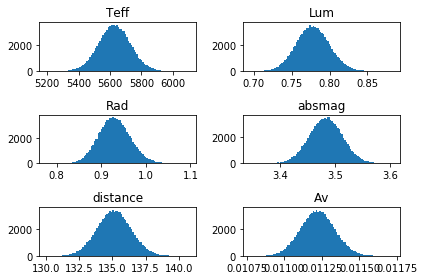

In [6]:
k = 0
for idx, row in df.iterrows():
    out_dir = main_dir+"output/{}/".format(row.Name)
    
    if isdir(out_dir) == False:
        os.makedirs(out_dir)
        
    if isfile(out_dir+"output.csv"):
        df2 = pd.read_csv(out_dir+"output.csv")
        
    else:
        kwargs={'method': 'direct', 
                'id_starname': idx, 
                'csv': main_dir+"Pleiades_iso.csv", 
                'outdir': out_dir, 'dust': 'allsky'}
        run(**kwargs);
    
        df2 = pd.read_csv(out_dir+"output.csv")
        
    ## retrieve radius
    df.at[idx, "iso_rad"] = float(df2.loc[df2['id_starname'] == 'dir_rad'][str(k)].values)
    df.at[idx, "iso_rad_Err"] = float(df2.loc[df2['id_starname'] == 'dir_rad_err1'][str(k)].values)
    ## retrieve teff
    df.at[idx, "iso_teff"] = float(df2.loc[df2['id_starname'] == 'dir_teff'][str(k)].values)
    df.at[idx, "iso_teff_Err"] = float(df2.loc[df2['id_starname'] == 'dir_teff_err1'][str(k)].values)
        
    k += 1

In [7]:
print("The following radii could not be estimated...")
print("\t {}".format(df.index[df.iso_rad == float(0)].values))

The following radii could not be estimated...
	 [ 14  47  63 146 195 215 227 248 284 302]


In [9]:
df.to_csv(data_dir+"Pleiades_master.csv")

## Merge with Kepler K2 Catalog

We wish to merge the previous catalogs with the K2 mission [catalog](http://adsabs.harvard.edu/abs/2017yCat.4034....0H). After coordinate matching, we will execute isoclassify with V and B magnitudes. We will then compare the resulting teff to those reported by K2.

In [77]:
df = pd.read_csv(data_dir+"Pleiades_master.csv", index_col=0)
df.head(2)
cols = df.columns

### Parsing K2 Data from VizieR

In [107]:
df_k2 = pd.read_csv(data_dir+"K2.csv")

In [108]:
df_k2["e_teff"] = df_k2[["ep_teff", "em_teff"]].mean(axis=1)
df_k2["Name"] = "J"+df_k2.twomass
df_k2 = df_k2[["Name", "bmag", "e_bmag", "vmag", "e_vmag", 
            "teff", "e_teff"]]
df_k2.columns = ["Name", "k2_bmag", "k2_e_bmag", "k2_vmag", "k2_e_vmag", "k2_teff", "k2_e_teff"]

In [110]:
df = pd.merge(df, df_k2, on="Name")

In [124]:
df.to_csv(data_dir+"Pleiades_master.csv")
df.head()

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref,BCK,logL/Lo,M/Mo,...,K2_teff,K2_teff_err,K2_rad,K2_rad_err,k2_bmag,k2_e_bmag,k2_vmag,k2_e_vmag,k2_teff,k2_e_teff
0,J03394633+2358531,54.943067,23.981442,11.83,4.89,1.138,1.0,2.73,-1.66,0.41,...,3959,348,0.413,0.1285,NaN,NaN,NaN,NaN,3959.0,348.0
1,J03414664+2301198,55.444367,23.022186,13.16,5.63,0.294,1.0,2.81,-2.23,0.19,...,3514,144,0.228,0.051,NaN,NaN,NaN,NaN,3514.0,144.0
2,J03414895+2303235,55.453963,23.056539,13.19,6.09,0.239,1.0,2.86,-2.26,0.19,...,3687,169,0.299,0.0745,NaN,NaN,NaN,NaN,3687.0,169.0
3,J03415671+2358434,55.486317,23.978728,13.25,5.76,0.401,1.0,2.82,-2.27,0.18,...,3654,169,0.295,0.075,NaN,NaN,NaN,NaN,3654.0,169.0
4,J03415864+2257020,55.494367,22.950556,11.90,4.78,6.842,1.0,2.72,-1.68,0.40,...,3565,163,0.266,0.053,NaN,NaN,NaN,NaN,3565.0,163.0


Only 86 stars have a Bmag value, should we still pursue this approach?

## Merge with Redbul 2016

In [25]:
df = pd.read_csv(data_dir+"Pleiades_master.csv", index_col=0)

df_red = pd.read_csv(data_dir+"Redbul2016.csv")
df_red["Name"] = "J" + df_red["2MASS"]
df_red.head(2)

,angDist,_RAJ2000,_DEJ2000,EPIC,RAJ2000,DEJ2000,Vmag,Ksmag,(V-K)0,Prot,...,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD,Name
0,0.014687,52.95768,22.84023,210991540,52.95768,22.84023,NaN,12.75,5.10,0.5749,...,13.006,12.749,0.023,0.026,0.024,AAA,222,0,2.450749e+06,J03314984+2250248
1,0.037661,53.03274,23.23265,211016313,53.03274,23.23265,NaN,12.25,5.05,0.3193,...,12.486,12.254,0.023,0.021,0.020,AAA,222,0,2.450749e+06,J03320786+2313575


In [36]:
df = pd.merge(df, df_red[["Name", "LPer"]], on="Name")
df.to_csv(data_dir+"Pleiades_master.csv")
df.head(2)

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref,BCK,logL/Lo,M/Mo,...,V_iso,V_iso_err,iso_rad,iso_rad_Err,iso_teff,iso_teff_Err,abs_g_mag,LPer_x,LPer_y,LPer
0,J03394633+2358531,54.943067,23.981442,11.83,4.89,1.138,1,2.73,-1.66,0.41,...,18.646667,0.593949,0.419426,0.013360,4222.314643,100.0,15.574630,1.14,1.14,1.14
1,J03414664+2301198,55.444367,23.022186,13.16,5.63,0.294,1,2.81,-2.23,0.19,...,46.221644,1.654124,0.268599,0.009612,3951.132391,100.0,17.335994,NaN,NaN,NaN


### Checking if Prot and LPer are in agreement
If LPer and Period are within a 10% tolerance, we assign a "True" flag to Prot_check, otherwise "False."

In [71]:
df["Prot_check"] = df.apply(lambda row: 
                            True if -0.10 <= (row.LPer-row.Period)/row.LPer <= 0.10
                            else False, axis=1)

In [73]:
df.to_csv(data_dir+"Pleiades_master.csv")

## Using Isoclassify with B and V mags From K2

### Converting data to Isoclassify readable format

In [3]:
df = pd.read_csv(data_dir+"Pleiades_master.csv", index_col=0)
df["band"] = "kmag"
df["parallax"] = df["parallax"] * 10 ** (-3)
df["parallax_error"] = df["parallax_error"] * 10 ** (-3)
df["Index"] = df.index
df_iso = df[["Index", "RA", "Dec", 
            "parallax", 
            "parallax_error",
            "k2_bmag", "k2_e_bmag", 
             "k2_vmag", "k2_e_vmag",
            "band", "Name"
             ]][~df.k2_bmag.isnull() & ~df.k2_vmag.isnull()]
df_iso.columns = ["id_starname", "ra","dec",
                  "parallax","parallax_err",
                  "bmag","bmag_err",
                  "vmag","vmag_err",
                  "band","comments"]

df = df.drop(columns="Index")
df_iso.to_csv(main_dir+"Pleiades_iso.csv")

### Executing Isoclassify

In [4]:
from os.path import isdir, isfile
import sys
sys.path.append("/u/kaimibk/Documents/scripts/isoclassify/")
from isoclassify import *

In [5]:
k = 0
for idx, row in df.iterrows():
    if k%10 ==0: print(k)
        
    out_dir = main_dir+"output_K2/{}/".format(row.Name)
    
    if isdir(out_dir) == False:
        os.makedirs(out_dir)
        
    if isfile(out_dir+"output.csv"):
        df2 = pd.read_csv(out_dir+"output.csv")
        
    else:
        kwargs={'method': 'direct', 
                'id_starname': idx, 
                'csv': main_dir+"Pleiades_iso.csv", 
                'outdir': out_dir, 'dust': 'allsky'}
        run(**kwargs);
    
        df2 = pd.read_csv(out_dir+"output.csv")
        
    ## retrieve radius
    df.at[idx, "iso_rad"] = float(df2.loc[df2['id_starname'] == 'dir_rad'][str(k)].values)
    df.at[idx, "iso_rad_Err"] = float(df2.loc[df2['id_starname'] == 'dir_rad_err1'][str(k)].values)
    ## retrieve teff
    df.at[idx, "iso_teff"] = float(df2.loc[df2['id_starname'] == 'dir_teff'][str(k)].values)
    df.at[idx, "iso_teff_Err"] = float(df2.loc[df2['id_starname'] == 'dir_teff_err1'][str(k)].values)
        
    k += 1

0
id_starname 8
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag -99 0
hmag -99 0
kmag -99 0
parallax 0.0073691497463330485 2.7079746874860944e-05
bmag 15.957 0.08
vmag 14.472000000000001 0.05
btmag -99 0
vtmag -99 0
ra 55.60953333333333
dec 22.89466944444445
using max distance: 138.0
using min distance: 133.0
no input logg provided, guessing (using Mk): -170.51239076521415


NameError: global name 'rad' is not defined